This file wrangles the new metadata.

It'll also be the basis of Table 1 (demographics table) as well as supplementary tables that show demographics split by aspiration.

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import fisher_exact

# Read in metadata

In [2]:
fclinical_meta = '../../final/supp_files/patient_clinical_metadata.csv'

In [3]:
allmeta = pd.read_csv(fclinical_meta)
print(allmeta.shape)
allmeta.head()

(220, 33)


,subject_id,bal,gastric_fluid,throat_swab,stool,mbs_consolidated,age,gender_all,abx_all,ppi_all,...,pneum_all,ear_inf_all,sinus_inf_all,pgsq_symp_all,pgsq_total_all,metadata_id,Total number of reflux episodes (acid+non-acid),number of full colum events/total events,percent proximal total,percent distal total
0,04-080-7,True,True,True,False,NaN,7.413699,M,0,0,...,0.0,0.0,0.0,0.470,0.26,k23,NaN,NaN,NaN,NaN
1,01-299-7,False,False,True,False,NaN,11.301370,M,0,0,...,0.0,0.0,0.0,2.120,1.19,r01_baseline_v2,NaN,NaN,NaN,NaN
2,04-167-8,False,True,False,False,Aspiration/Penetration,5.079452,F,0,1,...,0.0,1.0,0.0,0.530,0.57,k23,5.0,0.0,0.000619,0.00081
3,04-087-1,True,True,True,False,NaN,2.775342,M,0,0,...,0.0,0.0,1.0,1.470,1.39,k23,NaN,NaN,NaN,NaN
4,042-6-F1,False,False,True,False,NaN,10.846575,M,0,1,...,0.0,NaN,NaN,2.088,2.73,fundo_v2,NaN,NaN,NaN,NaN


In [4]:
meta_cols = [
    'gender_all',
    'abx_all',
    'ppi_all',
    'h2blockers_all',
    'inhaled_steroids_all',
    'oral_steroids_all',
    'prob_swall_all',
    'food_stuck_all',
    'diff_swall_all',
    'abd_pain_all',
    'const_all',
    'wtloss_all',
    'foodup_all',
    'chest_pain_all',
    'asthma_all',
    'chronic_cough_all',
    'pneum_all',
    'ear_inf_all',
    'sinus_inf_all',
    'pgsq_symp_all', 
    'pgsq_total_all'
]

In [5]:
allmeta.groupby('mbs_consolidated').size()

mbs_consolidated
Aspiration/Penetration    47
Normal                    57
dtype: int64

In [6]:
from IPython.display import display, HTML

# Convert all values to strings 
allmeta = allmeta.replace({1: '1', 0: '0'})
allmeta = allmeta.fillna('nan')

for c in meta_cols[:-2]:
    print(c)
#    print(allmeta.groupby(['mbs_consolidated', c]).size())
    display(HTML(allmeta.groupby(['mbs_consolidated', c]).size().to_frame(name='n').to_html()))
    print("")

gender_all



abx_all



ppi_all



h2blockers_all



inhaled_steroids_all



oral_steroids_all



prob_swall_all



food_stuck_all



diff_swall_all



abd_pain_all



const_all



wtloss_all



foodup_all



chest_pain_all



asthma_all



chronic_cough_all



pneum_all



ear_inf_all



sinus_inf_all


# Print tables for paper

In [7]:
row_dict = {
    'gender_all': 'Gender',
    'pneum_all': 'History of pneumonia',
    'abx_all': 'History of any recent antibiotics',
    'ppi_all': 'Currently taking PPIs',
    'inhaled_steroids_all': 'Current use of inhaled steroids',
    'oral_steroids_all': 'Recent use of oral steroids',
    'prob_swall_all': 'Problem swallowing',
    'food_stuck_all': 'Food stuck',
    'diff_swall_all': 'Difficulty swallowing',
    'abd_pain_all': 'Abdominal pain',
    'const_all': 'Constipation',
    'wtloss_all': 'Weight loss',
    'foodup_all': 'Food coming up',
    'chest_pain_all': 'Chest pain',
    'asthma_all': 'Asthma',
    'chronic_cough_all': 'Chronic cough',
    'h2blockers_all': 'Currently taking H2 blockers',
    'ear_inf_all': 'Recent history of ear infection',
    'sinus_inf_all': 'Recent history of sinus infection',
    'pgsq_symp_all': 'PGSQ symptom score',
    'pgsq_total_all': 'PGSQ total score',
    'age': 'Age'
}

In [8]:
print("\\toprule")
print("\multicolumn{1}{l}{\\textbf{Demographics}} & \\\\ ")
print("\midrule")

# First, age and gender
tmp = allmeta.groupby('gender_all').size()
print('Gender & '+ 
      '{} M, {} F'.format(tmp['M'], tmp['F']) 
      + ' \\\\ ')

print('Age & '
    + '{:.1f} $\pm$ {:.1f} years'.format(
    allmeta['age'].replace('nan', np.nan).mean(), 
    allmeta['age'].replace('nan', np.nan).std()) 
      + ' \\\\ ')

# GI scores
# Note: PGSQ means Pediatric Gastroesophageal Symptom and Quality of Life Questionnaire 
print("\midrule")
print("\multicolumn{1}{l}{\\textbf{Symptom and quality of life scores}} & \\\\ ")
print("\midrule")

c = 'pgsq_symp_all'
print(row_dict[c] + ' & '
    + '{:.1f} $\pm$  {:.2f} (N = {})'.format(
    allmeta[c].replace('nan', np.nan).astype(float).mean(), 
    allmeta[c].replace('nan', np.nan).astype(float).std(),
    allmeta[c].replace('nan', np.nan).dropna().shape[0]) 
      + ' \\\\ ')
c = 'pgsq_total_all'
print(row_dict[c] + ' & '
    + '{:.1f} $\pm$  {:.2f} (N = {})'.format(
    allmeta[c].replace('nan', np.nan).astype(float).mean(), 
    allmeta[c].replace('nan', np.nan).astype(float).std(),
    allmeta[c].replace('nan', np.nan).dropna().shape[0]) 
      + ' \\\\ ')

# Next, medications
print("\midrule")
print("\\\\")
print("\multicolumn{1}{l}{\\textbf{Medications}} &  \\\\ ")
print("\midrule")

meds =  [
    #'abx_all',
    'ppi_all',
    'h2blockers_all',
    'inhaled_steroids_all',
    #'oral_steroids_all'
]

for c in meds:
    tmp = allmeta.groupby(c).size()
    if 'nan' not in tmp.index:
        tmp.loc['nan'] = 0
    perc = float(tmp['1'] / 220.0)
    print(row_dict[c] + ' & ' +
          '{:.0f}\%'.format(perc*100)
          + ' (' + '/'.join([str(i) for i in [tmp['1'], (tmp['0'] + tmp['1'])]])
          + ') \\\\')

# Symptoms and comorbities
print("\midrule")
print("\multicolumn{1}{l}{\\textbf{Symptoms within last 6 months}} & \\\\ ")
print("\midrule")

symps = [
    'prob_swall_all',
    'food_stuck_all',
    'diff_swall_all',
    'abd_pain_all',
    'const_all',
    'wtloss_all',
    'foodup_all',
    'chest_pain_all',
    #'asthma_all',
    'chronic_cough_all',
]

for c in symps:
    tmp = allmeta.groupby(c).size()
    if 'nan' not in tmp.index:
        tmp.loc['nan'] = 0
    perc = float(tmp['1'] / 220.0)
    print(row_dict[c] + ' & ' +
          '{:.0f}\%'.format(perc*100)
          + ' (' + '/'.join([str(i) for i in [tmp['1'], (tmp['0'] + tmp['1'])]])
          + ') \\\\')
    
# Infection history
print("\midrule")
print("\multicolumn{1}{l}{\\textbf{Infection history within 6 months}} & \\\\")
print("\midrule")

infecs = [
    'pneum_all',
    'ear_inf_all',
    'sinus_inf_all',
    'abx_all'
]

for c in infecs:
    tmp = allmeta.groupby(c).size()
    perc = float(tmp['1'] / 220.0)

    if 'nan' not in tmp.index:
        tmp.loc['nan'] = 0

    print(row_dict[c] + ' & ' +
          '{:.0f}\%'.format(perc*100)
          + ' (' + '/'.join([str(i) for i in [tmp['1'], (tmp['0'] + tmp['1'])]])
          + ') \\\\')

print('\\bottomrule')

\toprule
\multicolumn{1}{l}{\textbf{Demographics}} & \\ 
\midrule
Gender & 129 M, 91 F \\ 
Age & 7.4 $\pm$ 5.5 years \\ 
\midrule
\multicolumn{1}{l}{\textbf{Symptom and quality of life scores}} & \\ 
\midrule
PGSQ symptom score & 0.9 $\pm$  0.72 (N = 182) \\ 
PGSQ total score & 0.9 $\pm$  0.69 (N = 179) \\ 
\midrule
\\
\multicolumn{1}{l}{\textbf{Medications}} &  \\ 
\midrule
Currently taking PPIs & 50\% (109/220) \\
Currently taking H2 blockers & 18\% (40/219) \\
Current use of inhaled steroids & 60\% (133/220) \\
\midrule
\multicolumn{1}{l}{\textbf{Symptoms within last 6 months}} & \\ 
\midrule
Problem swallowing & 16\% (35/197) \\
Food stuck & 24\% (52/197) \\
Difficulty swallowing & 27\% (60/198) \\
Abdominal pain & 40\% (88/205) \\
Constipation & 32\% (71/175) \\
Weight loss & 21\% (47/195) \\
Food coming up & 39\% (86/201) \\
Chest pain & 25\% (54/197) \\
Chronic cough & 51\% (112/166) \\
\midrule
\multicolumn{1}{l}{\textbf{Infection history within 6 months}} & \\
\midrule
History

# Aspiration/non-aspiration version of Table 1

Also add a Fisher's exact test for the symptoms and medications

In [38]:
def one_row(c):
    keep_asps = ['Aspiration/Penetration', 'Normal']

    tmprow = [row_dict[c]]

    grouped = allmeta.groupby(['mbs_consolidated', c]).size()
    
    for subj_type in ['Aspiration/Penetration', 'Normal']:#, 'nan']:
        tmp = grouped[subj_type]
        
        if c == 'gender_all':
            tmprow += [
                '{} M, {} F'.format(tmp['M'], tmp['F'])
            ]
        elif c in ['age']:
            submeta = allmeta.query('mbs_consolidated == @subj_type')[c].replace('nan', np.nan).astype(float)
            tmprow += [
                '{:.1f} $\pm$ {:.1f} years'.format(submeta.mean(), submeta.std())
            ]
        elif c in ['pgsq_symp_all', 'pgsq_total_all']:
            submeta = allmeta.query('mbs_consolidated == @subj_type')[c].replace('nan', np.nan).astype(float)
            tmprow += [
                '{:.1f} $\pm$ {:.2f}'.format(submeta.mean(), submeta.std())
            ]
        # If it's symptoms or medications
        else:
            if 'nan' not in tmp.index:
                tmp.loc['nan'] = 0

            # Calcaulte percent with the thing
            perc = float(tmp['1']) / (tmp['0'] + tmp['1'])
            
            tmprow += [
                '{:.0f}\%'.format(perc*100) + 
                ' (' + '/'.join([str(i) for i in [tmp['1'], (tmp['0'] + tmp['1'])]]) + ')'
                ]

            # Calculate Fisher's p-value on the last round
            if subj_type == "Normal":
            
                grouped = grouped.reset_index(name='size')
    
                # Remove missing data
                grouped = grouped.query('mbs_consolidated == @keep_asps')
                grouped = grouped[grouped[c].isin(['0', '1'])]

                # Pivot to square table for fisher test
                grouped = grouped.pivot(index='mbs_consolidated', columns=c, values='size')

                tmprow.append('{:.2f}'.format(fisher_exact(grouped.values)[1]))
                    
    return ' & '.join(tmprow)

In [39]:
one_row('age')

'Age & 3.9 $\\pm$ 4.1 years & 6.7 $\\pm$ 4.7 years'

In [40]:
one_row('ppi_all')

'Currently taking PPIs & 55\\% (26/47) & 58\\% (33/57) & 0.84'

In [41]:
# subj_type = ['Aspiration/Penetration']
# submeta = allmeta.query('mbs_consolidated == @subj_type')[c].replace('nan', np.nan).replace(' ', np.nan)
# submeta.sort_values()

In [42]:
print("\\toprule")
print("\multicolumn{1}{l}{\\textbf{Demographics}}  \\\\ ")
print("\midrule")

allrows = []

# First, age and gender
allrows.append(one_row('gender_all'))
allrows.append(one_row('age'))
print(' \\\\ \n'.join(allrows) + ' \\\\ ')

# GI scores
# Note: PGSQ means Pediatric Gastroesophageal Symptom and Quality of Life Questionnaire 
print("\midrule")
print("\multicolumn{1}{l}{\\textbf{Symptom and quality of life scores}}  \\\\ ")
print("\midrule")

allrows = []
c = 'pgsq_symp_all'
allrows.append(one_row(c))

c = 'pgsq_total_all'
allrows.append(one_row(c))
print(' \\\\ \n'.join(allrows) + ' \\\\ ')

# Next, medications
print("\midrule")
#print("\multicolumn{1}{l}{} \\\\")
print("\multicolumn{1}{l}{\\textbf{Medications}}   \\\\ ")
print("\midrule")

meds =  [
    #'abx_all',
    'ppi_all',
    'h2blockers_all',
    'inhaled_steroids_all',
    #'oral_steroids_all'
]

allrows = []
for c in meds:
    allrows.append(one_row(c))
print(' \\\\ \n'.join(allrows) + ' \\\\ ')

# Symptoms and comorbities
print("\midrule")
print("\multicolumn{1}{l}{\\textbf{Symptoms within last 6 months}}  \\\\ ")
print("\midrule")

symps = [
    'prob_swall_all',
    'food_stuck_all',
    'diff_swall_all',
    'abd_pain_all',
    'const_all',
    'wtloss_all',
    'foodup_all',
    'chest_pain_all',
    #'asthma_all',
    'chronic_cough_all',
]


allrows = []
for c in symps:
    allrows.append(one_row(c))
print(' \\\\ \n'.join(allrows) + ' \\\\ ')

# Infection history
print("\midrule")
print("\multicolumn{1}{l}{\\textbf{Infection history within 6 months}}  \\\\")
print("\midrule")

infecs = [
    'pneum_all',
    'ear_inf_all',
    'sinus_inf_all',
    'abx_all'
]

allrows = []
for c in infecs:
    allrows.append(one_row(c))
print(' \\\\ \n'.join(allrows) + ' \\\\ ')


print('\\bottomrule')

\toprule
\multicolumn{1}{l}{\textbf{Demographics}}  \\ 
\midrule
Gender & 30 M, 17 F & 31 M, 26 F \\ 
Age & 3.9 $\pm$ 4.1 years & 6.7 $\pm$ 4.7 years \\ 
\midrule
\multicolumn{1}{l}{\textbf{Symptom and quality of life scores}}  \\ 
\midrule
PGSQ symptom score & 0.9 $\pm$ 0.75 & 0.9 $\pm$ 0.71 \\ 
PGSQ total score & 0.7 $\pm$ 0.61 & 0.9 $\pm$ 0.70 \\ 
\midrule
\multicolumn{1}{l}{} \\
\multicolumn{1}{l}{\textbf{Medications}}   \\ 
\midrule
Currently taking PPIs & 55\% (26/47) & 58\% (33/57) & 0.84 \\ 
Currently taking H2 blockers & 15\% (7/47) & 21\% (12/57) & 0.46 \\ 
Current use of inhaled steroids & 72\% (34/47) & 75\% (43/57) & 0.82 \\ 
\midrule
\multicolumn{1}{l}{\textbf{Symptoms within last 6 months}}  \\ 
\midrule
Problem swallowing & 7\% (3/41) & 22\% (12/54) & 0.09 \\ 
Food stuck & 29\% (12/41) & 26\% (14/54) & 0.82 \\ 
Difficulty swallowing & 34\% (14/41) & 28\% (15/54) & 0.51 \\ 
Abdominal pain & 37\% (16/43) & 32\% (18/56) & 0.67 \\ 
Constipation & 35\% (14/40) & 37\% (19/52)

In [14]:
c = 'ppi_all'
grouped = allmeta.groupby(['mbs_consolidated', c]).size()

grouped = grouped.reset_index(name='size')

# Remove missing data
keep_asps = ['Aspiration/Penetration', 'Normal']
grouped = grouped.query('mbs_consolidated == @keep_asps')
grouped = grouped[grouped[c].isin(['0', '1'])]

# Pivot to square table for fisher test
grouped = grouped.pivot(index='mbs_consolidated', columns=c, values='size')
print(fisher_exact(grouped.values))
grouped

(1.1105769230769231, 0.8438557461770853)


ppi_all,0,1
mbs_consolidated,,
Aspiration/Penetration,21,26
Normal,24,33


In [15]:
c = 'inhaled_steroids_all'
grouped = allmeta.groupby(['mbs_consolidated', c]).size()

grouped = grouped.reset_index(name='size')

# Remove missing data
keep_asps = ['Aspiration/Penetration', 'Normal']
grouped = grouped.query('mbs_consolidated == @keep_asps')
grouped = grouped[grouped[c].isin(['0', '1'])]

# Pivot to square table for fisher test
grouped = grouped.pivot(index='mbs_consolidated', columns=c, values='size')
print(fisher_exact(grouped.values))
grouped

(1.1743697478991597, 0.8230841375477641)


inhaled_steroids_all,0,1
mbs_consolidated,,
Aspiration/Penetration,13,34
Normal,14,43


In [16]:
c = 'chronic_cough_all'
grouped = allmeta.groupby(['mbs_consolidated', c]).size()

grouped = grouped.reset_index(name='size')

# Remove missing data
keep_asps = ['Aspiration/Penetration', 'Normal']
grouped = grouped.query('mbs_consolidated == @keep_asps')
grouped = grouped[grouped[c].isin(['0', '1'])]

# Pivot to square table for fisher test
grouped = grouped.pivot(index='mbs_consolidated', columns=c, values='size')
print(fisher_exact(grouped.values))
grouped

(1.3511111111111112, 0.5209644642610347)


chronic_cough_all,0,1
mbs_consolidated,,
Aspiration/Penetration,16,30
Normal,15,38


# PGSQ scores

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [18]:
asp_colors = {'Normal': '#B25116', 'Aspiration/Penetration': '#FB84D1', 'nan': '#C9C9C9'}

boxprops = {'edgecolor': 'k', 'facecolor': 'w'}
lineprops = {'color': 'k'}

boxplot_kwargs = {'boxprops': boxprops, 'medianprops': lineprops,
                   'whiskerprops': lineprops, 'capprops': lineprops}

/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/claire/anaconda/envs/aspiration/lib/python2.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


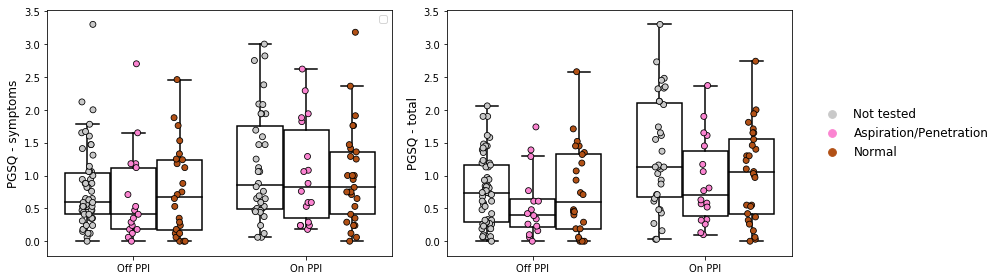

In [19]:
c = 'pgsq_symp_all'
allmeta[c] = allmeta[c].replace('nan', np.nan).astype(float)

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(data=allmeta, x='ppi_all', y=c, hue='mbs_consolidated',
            fliersize=0, ax=ax[0], color='w',
            **boxplot_kwargs)
sns.stripplot(data=allmeta, x='ppi_all', y=c, hue='mbs_consolidated',
              ax=ax[0], jitter=True, split=True, palette=asp_colors,
              linewidth=0.8, edgecolor='k', s=6, color='w')

ax[0].set_xlabel('')
ax[0].set_xticklabels(['Off PPI', 'On PPI'])
ax[0].set_ylabel('PGSQ - symptoms', fontsize='large')

ax[0].legend([])

c = 'pgsq_total_all'
allmeta[c] = allmeta[c].replace('nan', np.nan).astype(float)

sns.boxplot(data=allmeta, x='ppi_all', y=c, hue='mbs_consolidated',
            fliersize=0, ax=ax[1], color='w',
            **boxplot_kwargs)
sns.stripplot(data=allmeta, x='ppi_all', y=c, hue='mbs_consolidated',
              ax=ax[1], jitter=True, split=True, palette=asp_colors,
              linewidth=0.8, edgecolor='k', s=6, color='w')

ax[1].set_xlabel('')
ax[1].set_xticklabels(['Off PPI', 'On PPI'])
ax[1].set_ylabel('PGSQ - total', fontsize='large')


handles, labels = ax[1].get_legend_handles_labels()
lgd = ax[1].legend(handles[-3:], 
              ['Not tested', 'Aspiration/Penetration', 'Normal'], 
              loc='center left', 
              fontsize='large',
              bbox_to_anchor=(1.05, 0.5), 
              frameon=False,
              edgecolor='k')

fig.tight_layout()
fig.savefig('../../final/figures/reviewer.pgsq_scores.png')

Statistical significant between on and off PPI?

In [20]:
from scipy.stats import ranksums

In [21]:
c = 'pgsq_symp_all'
allmeta[c] = allmeta[c].replace('nan', np.nan).astype(float)

x = allmeta.query('ppi_all == "1"')[c].values
y = allmeta.query('ppi_all == "0"')[c].values
print(c, ranksums(x, y))

c = 'pgsq_total_all'
allmeta[c] = allmeta[c].replace('nan', np.nan).astype(float)

x = allmeta.query('ppi_all == "1"')[c].values
y = allmeta.query('ppi_all == "0"')[c].values
print(c, ranksums(x, y))


('pgsq_symp_all', RanksumsResult(statistic=3.6723460095141065, pvalue=0.00024033397388416896))
('pgsq_total_all', RanksumsResult(statistic=3.9996476873162004, pvalue=6.343685031382997e-05))


In [22]:
# How about on and off PPI, but aspirator vs. non-aspirator?

In [23]:
asp = 'Aspiration/Penetration'
nml = 'Normal'

c = 'pgsq_symp_all'
allmeta[c] = allmeta[c].replace('nan', np.nan).astype(float)

ppi = "1"
x = allmeta.query('ppi_all == @ppi').query("mbs_consolidated == @asp")[c].values
y = allmeta.query('ppi_all == @ppi').query("mbs_consolidated == @nml")[c].values
print(c, ppi, ranksums(x, y))

ppi = "0"
x = allmeta.query('ppi_all == @ppi').query("mbs_consolidated == @asp")[c].values
y = allmeta.query('ppi_all == @ppi').query("mbs_consolidated == @nml")[c].values
print(c, ppi, ranksums(x, y))

c = 'pgsq_total_all'
allmeta[c] = allmeta[c].replace('nan', np.nan).astype(float)

ppi = "1"
x = allmeta.query('ppi_all == @ppi').query("mbs_consolidated == @asp")[c].values
y = allmeta.query('ppi_all == @ppi').query("mbs_consolidated == @nml")[c].values
print(c, ppi, ranksums(x, y))

ppi = "0"
x = allmeta.query('ppi_all == @ppi').query("mbs_consolidated == @asp")[c].values
y = allmeta.query('ppi_all == @ppi').query("mbs_consolidated == @nml")[c].values
print(c, ppi, ranksums(x, y))


('pgsq_symp_all', '1', RanksumsResult(statistic=1.320649165794693, pvalue=0.18661837120287783))
('pgsq_symp_all', '0', RanksumsResult(statistic=0.6597728450302706, pvalue=0.5093996118844368))
('pgsq_total_all', '1', RanksumsResult(statistic=0.8931557942079716, pvalue=0.37177374745660396))
('pgsq_total_all', '0', RanksumsResult(statistic=0.7166498144294319, pvalue=0.4735901991712047))


Okay, so patients On PPI do have significantly higher symptoms scores than patients Off PPI.

However, there's not difference in symptoms scores between aspirators and non-aspirators so this shouldn't affect our findings there.

In [24]:
allmeta.groupby(['ppi_all']).describe()[['pgsq_symp_all', 'pgsq_total_all']]

pgsq_symp_all                                                   \
                count      mean       std  min   25%   50%   75%   max   
ppi_all                                                                  
0                99.0  0.766485  0.638494  0.0  0.30  0.59  1.12  3.30   
1                83.0  1.057687  0.777890  0.0  0.47  0.83  1.53  3.18   

        pgsq_total_all                                                     
                 count      mean       std  min     25%   50%   75%   max  
ppi_all                                                                    
0                 97.0  0.735639  0.569018  0.0  0.2600  0.61  1.19  2.58  
1                 82.0  1.131341  0.768593  0.0  0.5225  1.08  1.65  3.30

In [32]:
c = 'pgsq_symp_all'

print(c)
print('All: {:.2f} +/- {:.2f}'.format(allmeta[c].mean(), allmeta[c].std()))
print('On : {:.2f} +/- {:.2f}'.format(allmeta.query('ppi_all == "1"')[c].mean(), allmeta.query('ppi_all == "1"')[c].std()))
print('Off : {:.2f} +/- {:.2f}'.format(allmeta.query('ppi_all == "0"')[c].mean(), allmeta.query('ppi_all == "0"')[c].std()))

print('')

c = 'pgsq_total_all'

print(c)
print('All: {:.2f} +/- {:.2f}'.format(allmeta[c].mean(), allmeta[c].std()))
print('On : {:.2f} +/- {:.2f}'.format(allmeta.query('ppi_all == "1"')[c].mean(), allmeta.query('ppi_all == "1"')[c].std()))
print('Off : {:.2f} +/- {:.2f}'.format(allmeta.query('ppi_all == "0"')[c].mean(), allmeta.query('ppi_all == "0"')[c].std()))


pgsq_symp_all
All: 0.90 +/- 0.72
On : 1.06 +/- 0.78
Off : 0.77 +/- 0.64

pgsq_total_all
All: 0.92 +/- 0.69
On : 1.13 +/- 0.77
Off : 0.74 +/- 0.57


In [26]:
allmeta[c].mean()

0.8992857142857144